In [37]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FactorAnalysis
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from time import time
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV

In [38]:
# define the size of the outout graph in later
size = (10, 6)
data_set = load_breast_cancer(as_frame=True)
X = data_set.data
y = data_set.target
scaler = StandardScaler()
scaler.fit(X)
data_scaled = scaler.transform(X)
X = pd.DataFrame(data=data_scaled, columns=X.columns)
gmm_prob = GaussianMixture(n_components=2)
gmm_prob.fit(X)
cluster_gmm_prob = gmm_prob.predict_proba(X)
cluster_gmm_prob[:, 0].shape

(569,)

In [39]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

ica = FastICA(n_components=2)
ica.fit(X)
X_ica = ica.transform(X)

rp = GaussianRandomProjection(n_components=2)
rp.fit(X)
X_rp = rp.transform(X)

fa = FactorAnalysis(n_components=2)
fa.fit(X)
X_fa = fa.transform(X)

Xs = [X_pca, X_ica, X_rp, X_fa]
names = ['PCA', 'ICA', 'RP', 'FA']

In [40]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'hidden_layer_sizes': [10, 20, 30, 40, 50, 60],
                     'learning_rate_init':[0.01, 0.02, 0.03, 0.04]
                     }]

models_cv = {'PCA': None, 'ICA': None, 'RP': None}
for data, algo in zip(Xs, names):
    cv = GridSearchCV(MLPClassifier(max_iter=2000), tuned_parameters, cv=5)
    cv.fit(data, y)
    models_cv[algo]=cv

In [42]:
best_models = {'PCA': None, 'ICA': None, 'RP': None, 'FA': None}
for data, algo in zip(Xs, names):
    # plt.xticks(ks_kmeans, ks_kmeans)
    # plt.setp(g, xticks=ks, xticklabels=ks)
    model = MLPClassifier(
        hidden_layer_sizes = models_cv[algo].best_params_['hidden_layer_sizes'], 
        learning_rate_init=models_cv[algo].best_params_['learning_rate_init'],
        max_iter=2000)
    
    model.fit(data, y)
    
    best_models[algo] = model

PCA


ICA


RP


FA




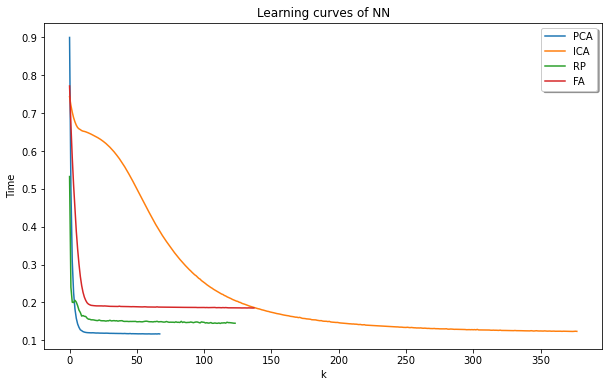

In [43]:
fig, g = plt.subplots(1, 1, figsize=size)
for algo in names:
    g.set_title("Learning curves of NN")
    g.set_ylabel('Time')
    g.set_xlabel('k')
    print(algo)
    print()
    print()
    g.plot(best_models[algo].loss_curve_, label=algo)
    g.legend(shadow=True, fancybox=True)